# Generative Adversarial Network Example

Build a generative adversarial network (GAN) to generate digit images from a noise distribution with TensorFlow.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/
- Colab - https://colab.research.google.com/drive/1iesmx8m1_MxRo_JZfxl9LzJB9zQXr_we

## GAN Overview

<img src="http://www.timzhangyuxuan.com/static/images/project_DCGAN/structure.png" alt="nn" style="width: 800px;"/>

References:
- [Generative adversarial nets](https://arxiv.org/pdf/1406.2661.pdf). I Goodfellow, J Pouget-Abadie, M Mirza, B Xu, D Warde-Farley, S Ozair, Y. Bengio. Advances in neural information processing systems, 2672-2680.
- [Understanding the difficulty of training deep feedforward neural networks](http://proceedings.mlr.press/v9/glorot10a.html). X Glorot, Y Bengio. Aistats 9, 249-256

Other tutorials:
- [Generative Adversarial Networks Explained](http://kvfrans.com/generative-adversial-networks-explained/). Kevin Frans.

## MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [1]:
from __future__ import division, print_function, absolute_import

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

/Users/jonathansherman/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/jonathansherman/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [7]:
# Training Params
num_steps = 1000000
batch_size = 128
learning_rate = 0.0002

# Network Params
image_dim = 784 # 28*28 pixels
gen_hidden_dim = 256
disc_hidden_dim = 256
noise_dim = 100 # Noise data points

# A custom initialization (see Xavier Glorot init)
def glorot_init(shape):
    return tf.random_normal(shape=shape, stddev=1. / tf.sqrt(shape[0] / 2.))

In [4]:
# Store layers weight & bias
weights = {
    'gen_hidden1': tf.Variable(glorot_init([noise_dim, gen_hidden_dim])),
    'gen_out': tf.Variable(glorot_init([gen_hidden_dim, image_dim])),
    'disc_hidden1': tf.Variable(glorot_init([image_dim, disc_hidden_dim])),
    'disc_out': tf.Variable(glorot_init([disc_hidden_dim, 1])),
}
biases = {
    'gen_hidden1': tf.Variable(tf.zeros([gen_hidden_dim])),
    'gen_out': tf.Variable(tf.zeros([image_dim])),
    'disc_hidden1': tf.Variable(tf.zeros([disc_hidden_dim])),
    'disc_out': tf.Variable(tf.zeros([1])),
}

In [5]:
# Generator
def generator(x):
    hidden_layer = tf.matmul(x, weights['gen_hidden1'])
    hidden_layer = tf.add(hidden_layer, biases['gen_hidden1'])
    hidden_layer = tf.nn.relu(hidden_layer)
    out_layer = tf.matmul(hidden_layer, weights['gen_out'])
    out_layer = tf.add(out_layer, biases['gen_out'])
    out_layer = tf.nn.sigmoid(out_layer)
    return out_layer


# Discriminator
def discriminator(x):
    hidden_layer = tf.matmul(x, weights['disc_hidden1'])
    hidden_layer = tf.add(hidden_layer, biases['disc_hidden1'])
    hidden_layer = tf.nn.relu(hidden_layer)
    out_layer = tf.matmul(hidden_layer, weights['disc_out'])
    out_layer = tf.add(out_layer, biases['disc_out'])
    out_layer = tf.nn.sigmoid(out_layer)
    return out_layer

# Build Networks
# Network Inputs
gen_input = tf.placeholder(tf.float32, shape=[None, noise_dim], name='input_noise')
disc_input = tf.placeholder(tf.float32, shape=[None, image_dim], name='disc_input')

# Build Generator Network
gen_sample = generator(gen_input)

# Build 2 Discriminator Networks (one from noise input, one from generated samples)
disc_real = discriminator(disc_input)
disc_fake = discriminator(gen_sample)

# Build Loss
gen_loss = -tf.reduce_mean(tf.log(disc_fake))
disc_loss = -tf.reduce_mean(tf.log(disc_real) + tf.log(1. - disc_fake))

# Build Optimizers
optimizer_gen = tf.train.AdamOptimizer(learning_rate=learning_rate)
optimizer_disc = tf.train.AdamOptimizer(learning_rate=learning_rate)

# Training Variables for each optimizer
# By default in TensorFlow, all variables are updated by each optimizer, so we
# need to precise for each one of them the specific variables to update.
# Generator Network Variables
gen_vars = [weights['gen_hidden1'], weights['gen_out'],
            biases['gen_hidden1'], biases['gen_out']]
# Discriminator Network Variables
disc_vars = [weights['disc_hidden1'], weights['disc_out'],
            biases['disc_hidden1'], biases['disc_out']]

# Create training operations
train_gen = optimizer_gen.minimize(gen_loss, var_list=gen_vars)
train_disc = optimizer_disc.minimize(disc_loss, var_list=disc_vars)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Step 1: Generator Loss: 0.639921, Discriminator Loss: 1.432446


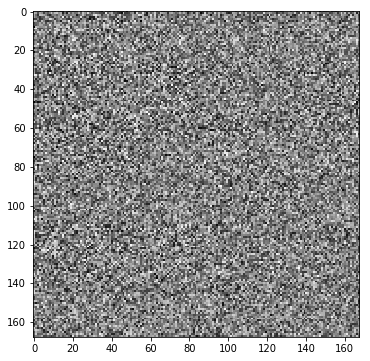

Step 2000: Generator Loss: 4.586748, Discriminator Loss: 0.038386


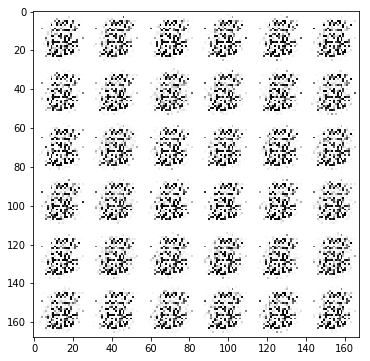

Step 4000: Generator Loss: 4.019377, Discriminator Loss: 0.082596


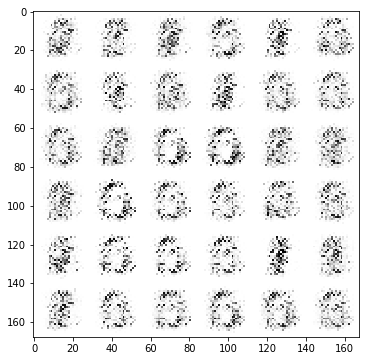

Step 6000: Generator Loss: 3.497467, Discriminator Loss: 0.157520


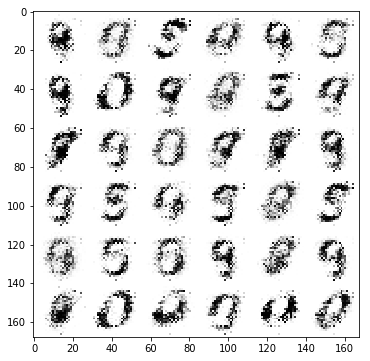

Step 8000: Generator Loss: 3.499787, Discriminator Loss: 0.200716


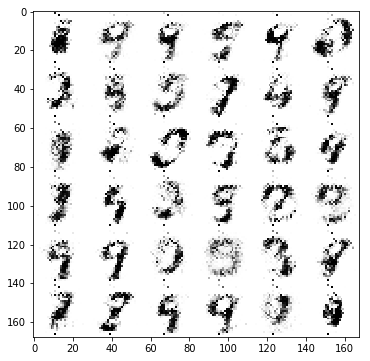

Step 10000: Generator Loss: 3.163284, Discriminator Loss: 0.341256


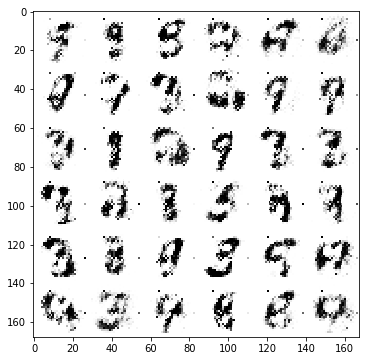

Step 12000: Generator Loss: 2.753732, Discriminator Loss: 0.367924


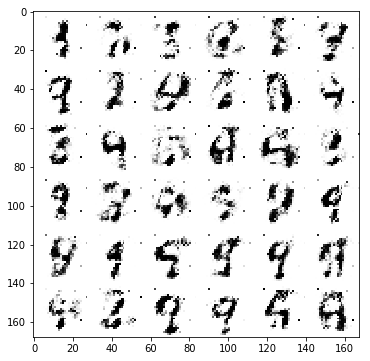

Step 14000: Generator Loss: 3.703249, Discriminator Loss: 0.285324


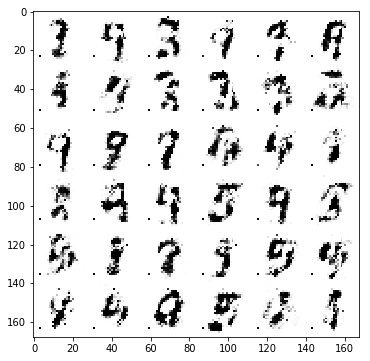

Step 16000: Generator Loss: 3.549953, Discriminator Loss: 0.235582


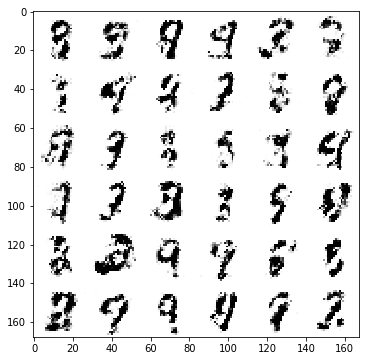

Step 18000: Generator Loss: 3.690241, Discriminator Loss: 0.248785


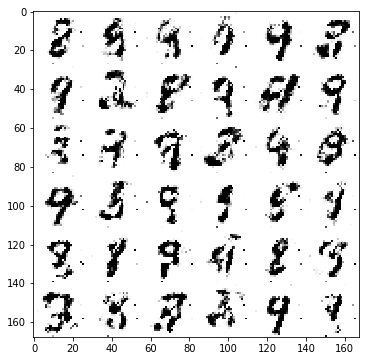

Step 20000: Generator Loss: 3.395397, Discriminator Loss: 0.286698


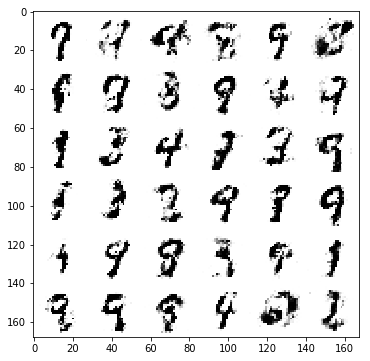

Step 22000: Generator Loss: 4.040878, Discriminator Loss: 0.277550


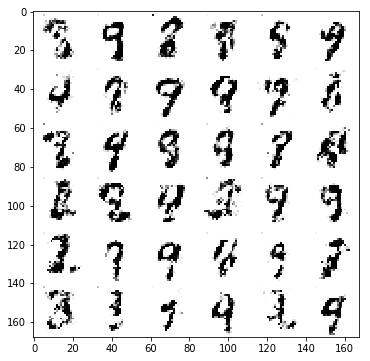

Step 24000: Generator Loss: 3.474896, Discriminator Loss: 0.275961


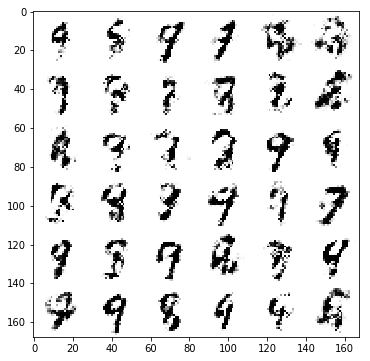

Step 26000: Generator Loss: 3.526274, Discriminator Loss: 0.292913


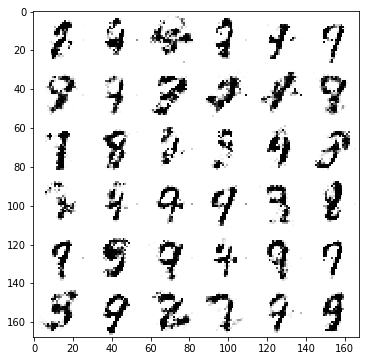

Step 28000: Generator Loss: 3.649072, Discriminator Loss: 0.284793


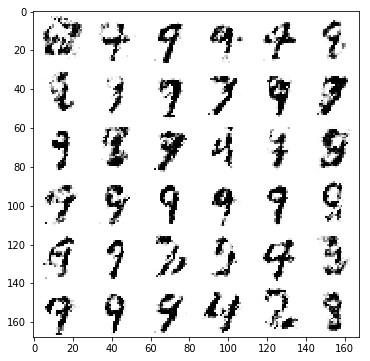

Step 30000: Generator Loss: 3.679966, Discriminator Loss: 0.266057


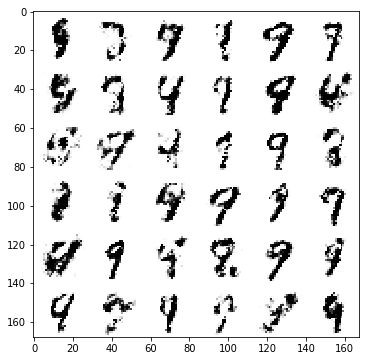

Step 32000: Generator Loss: 3.228360, Discriminator Loss: 0.372595


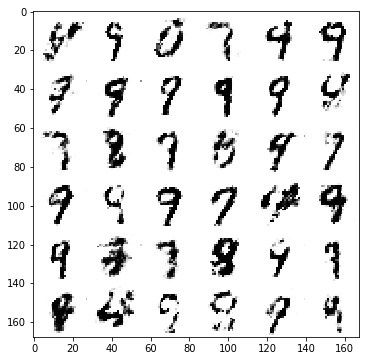

Step 34000: Generator Loss: 3.098544, Discriminator Loss: 0.392625


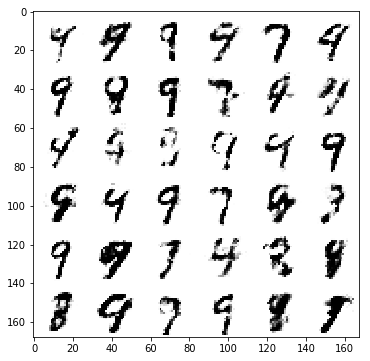

Step 36000: Generator Loss: 3.298633, Discriminator Loss: 0.380030


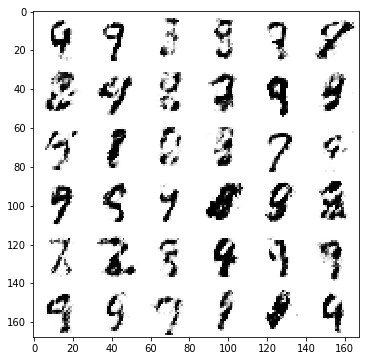

Step 38000: Generator Loss: 3.250907, Discriminator Loss: 0.386482


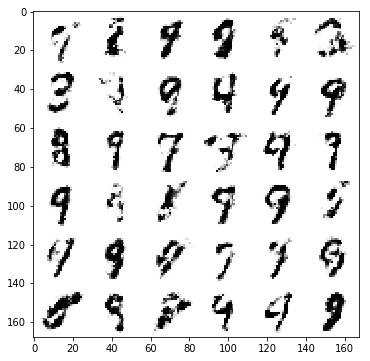

Step 40000: Generator Loss: 3.217526, Discriminator Loss: 0.431029


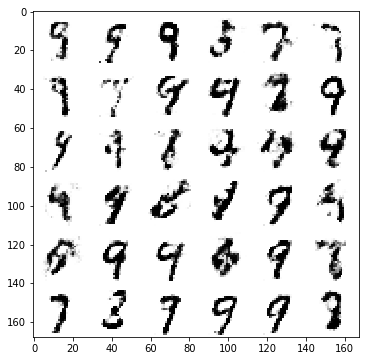

Step 42000: Generator Loss: 3.167817, Discriminator Loss: 0.401437


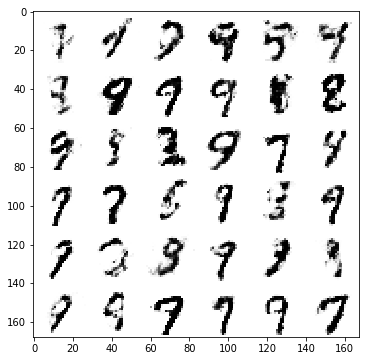

Step 44000: Generator Loss: 3.176330, Discriminator Loss: 0.407490


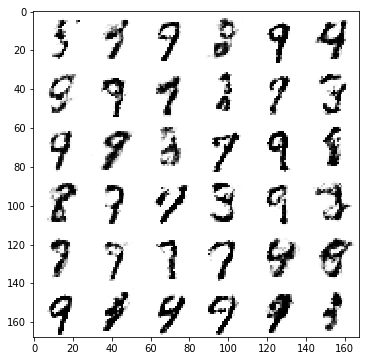

Step 46000: Generator Loss: 2.892605, Discriminator Loss: 0.515407


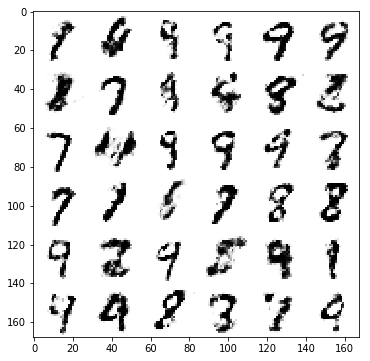

Step 48000: Generator Loss: 2.392160, Discriminator Loss: 0.501861


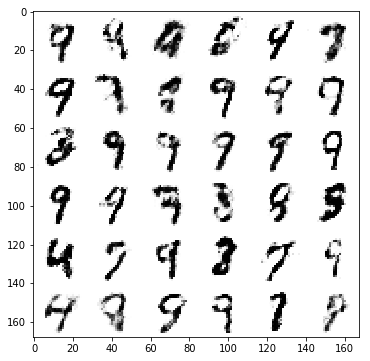

Step 50000: Generator Loss: 2.940694, Discriminator Loss: 0.435636


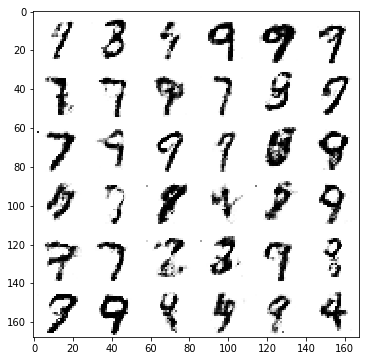

Step 52000: Generator Loss: 3.003750, Discriminator Loss: 0.382513


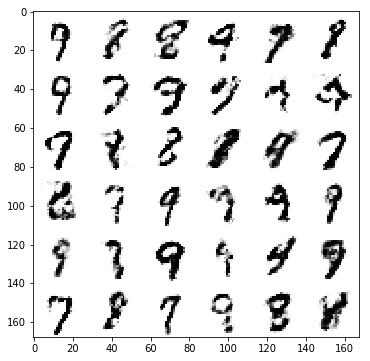

Step 54000: Generator Loss: 2.977842, Discriminator Loss: 0.465459


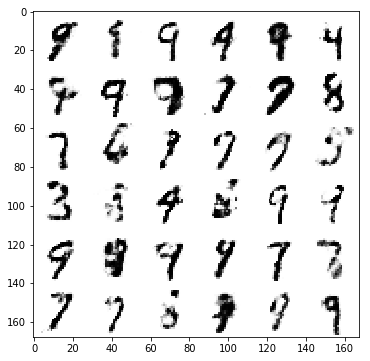

Step 56000: Generator Loss: 2.917429, Discriminator Loss: 0.387008


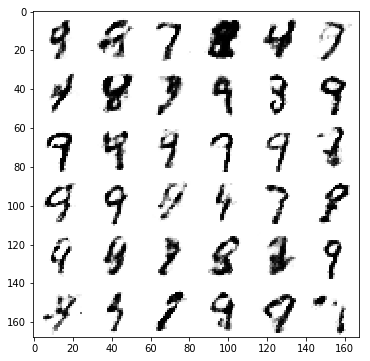

Step 58000: Generator Loss: 2.420526, Discriminator Loss: 0.514622


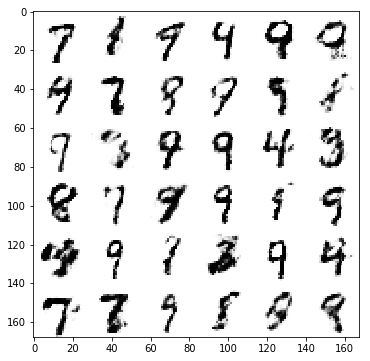

Step 60000: Generator Loss: 2.889475, Discriminator Loss: 0.411407


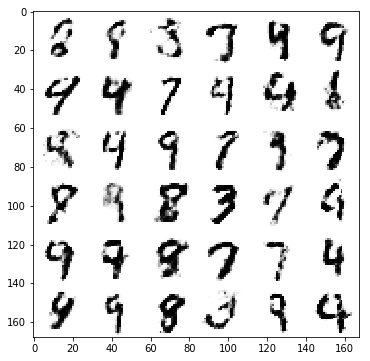

Step 62000: Generator Loss: 2.399863, Discriminator Loss: 0.561660


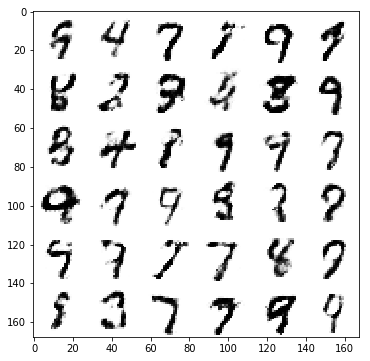

Step 64000: Generator Loss: 2.739161, Discriminator Loss: 0.537543


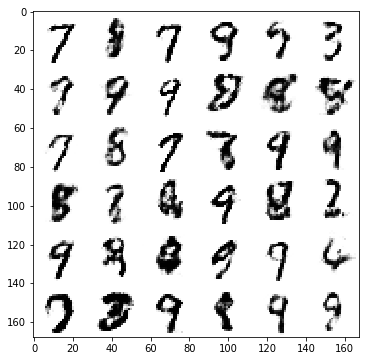

Step 66000: Generator Loss: 2.561490, Discriminator Loss: 0.528211


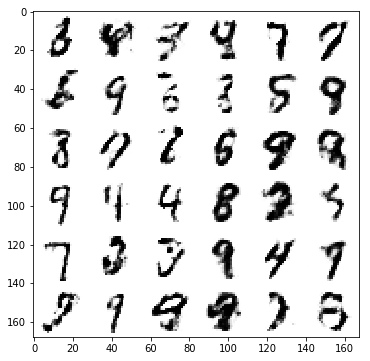

Step 68000: Generator Loss: 2.530683, Discriminator Loss: 0.493436


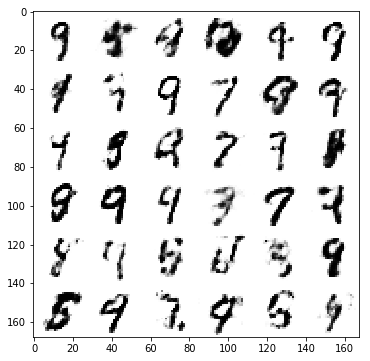

Step 70000: Generator Loss: 2.883587, Discriminator Loss: 0.348383


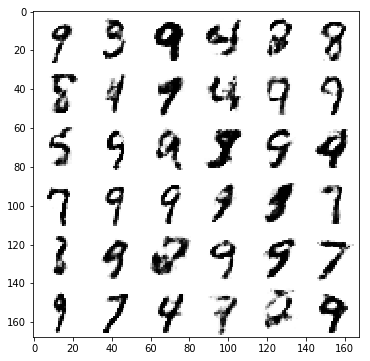

Step 72000: Generator Loss: 2.893949, Discriminator Loss: 0.404057


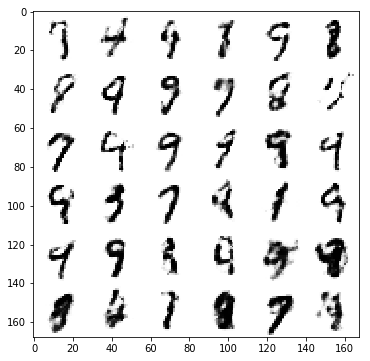

Step 74000: Generator Loss: 2.747444, Discriminator Loss: 0.487336


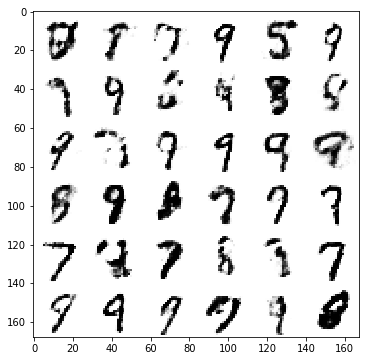

Step 76000: Generator Loss: 2.708287, Discriminator Loss: 0.460283


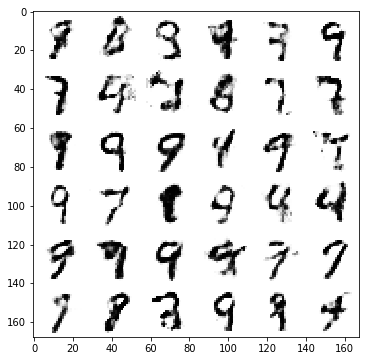

Step 78000: Generator Loss: 2.966981, Discriminator Loss: 0.426311


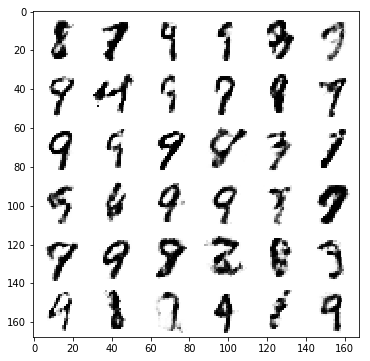

KeyboardInterrupt: 

In [6]:
# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)
    # Generate noise to feed to the generator
    z = np.random.uniform(-1., 1., size=[batch_size, noise_dim])

    # Train
    feed_dict = {disc_input: batch_x, gen_input: z}
    _, _, gl, dl = sess.run([train_gen, train_disc, gen_loss, disc_loss],
                            feed_dict=feed_dict)
    if i % 2000 == 0 or i == 1:
        print('Step %i: Generator Loss: %f, Discriminator Loss: %f' % (i, gl, dl))
        # Testing
        # Generate images from noise, using the generator network.
        n = 6
        canvas = np.empty((28 * n, 28 * n))
        for i in range(n):
            # Noise input.
            z = np.random.uniform(-1., 1., size=[n, noise_dim])
            # Generate image from noise.
            g = sess.run(gen_sample, feed_dict={gen_input: z})
            # Reverse colours for better display
            g = -1 * (g - 1)
            for j in range(n):
                # Draw the generated digits
                canvas[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

        plt.figure(figsize=(n, n))
        plt.imshow(canvas, origin="upper", cmap="gray")
        plt.show()

TO-DO: Convert to Doodle or Fashion-MNIST. Convert to 3-channel color data.